# Decision Tree Classification: Study Hours vs. Exam Passing

### Introduction and  Theory

A **Decision Tree Classification** is a supervised learning algorithm that makes predictions by asking a series of questions about the data. It splits data into smaller, more specific nodes to distinguish between classes.

In this project, we will build the decision tree to predict if a student passes an exam based on **Average Score** and **Hours Studied**.

### The Mathematical Model
The tree decides where to split the data by measuring **Impurity**. We want to split a mixed group of students (some passed, some failed) into two groups.

#### Entropy ($H$)
We use **Entropy** to measure impurity. A group with only one class (e.g. all passed) has an Entropy of 0. A group perfectly split (50% passed, 50% failed) has an Entropy of 1.

$$H(S) = - \sum_{i} p_i \cdot \log_2(p_i)$$

* $S$: The set of data.
* $p_i$: The probability of class $i$ in that set.

#### 2. Information Gain ($IG$)
To find the best features and thresholds, the algorithm tries every possible split and calculates the **Information Gain**. This measures how much Entropy was reduced by the split. The goal of the algorithm is to reduce maximize Information Gain.

$$IG(S) = H(S) - \sum_{c} \frac{|S_c|}{|S|} H(S_c)$$

* $H(S)$: Entropy of the parent group.
* $S_c$: The child groups created by the split.
* $\frac{|S_c|}{|S|}$: The weight of data that went into child group $c$.
* $H(S_c)$: Entropy of child group $c$.

### Libraries Import

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Preparation

In [35]:
# Creating the dataset
data = {
    "Student": ["Jeremy", "Noah", "Alyssa", "Daniel", "Sofia", "Colin", "Gracie", "Anne", "Jamal", "Trisha"],
    "Average Score": [65, 70, 82, 67, 92, 23, 96, 47, 75, 46],
    "Hours Studied": [3, 1, 3, 2, 4, 1, 5, 4, 2, 1],
    "Result": ["failed", "passed", "passed", "failed", "passed", "failed", "passed", "passed", "passed", "failed"]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Encoding "Passed" values
df["Result_Numeric"] = df["Result"].map({"passed": 1, "failed": 0})

print("Training Data:")
display(df)

Training Data:


,Student,Average Score,Hours Studied,Result,Result_Numeric
0,Jeremy,65,3,failed,0
1,Noah,70,1,passed,1
2,Alyssa,82,3,passed,1
3,Daniel,67,2,failed,0
4,Sofia,92,4,passed,1
5,Colin,23,1,failed,0
6,Gracie,96,5,passed,1
7,Anne,47,4,passed,1
8,Jamal,75,2,passed,1
9,Trisha,46,1,failed,0


### Calculating Entropy

In [36]:
# Extracting target labels
y = df["Result_Numeric"].values

# Determining exam pass rate
values, counts = np.unique(y, return_counts=True)

# Calculating probabilities
probabilities = counts / len(y)

# Calculating Entropy
parent_entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])

print(f"Counts (Fail, Pass): {counts}")
print(f"Probabilities: {probabilities}")
print(f"Parent Entropy H(S): {parent_entropy:.4f}")

Counts (Fail, Pass): [4 6]
Probabilities: [0.4 0.6]
Parent Entropy H(S): 0.9710


### Calculating the Best Splits

In [37]:
best_gain = -1
best_feature = None
best_threshold = None

features = ["Average Score", "Hours Studied"]

# Loop through every feature
for feature in features:
    X_column = df[feature].values

    # Sorting values
    unique_values = np.sort(np.unique(X_column))

    # Calculating thresholds
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2

    for threshold in thresholds:
        # Splitting data
        left_mask = X_column <= threshold
        right_mask = X_column > threshold

        y_left = y[left_mask]
        y_right = y[right_mask]

        # Handle invalid splits
        if len(y_left) == 0 or len(y_right) == 0:
            continue

        # Entropy calculation for children nodes
        # Left node
        val_l, counts_l = np.unique(y_left, return_counts=True)
        probs_l = counts_l / len(y_left)
        entropy_left = -np.sum([p * np.log2(p) for p in probs_l if p > 0])

        # Right node
        val_r, counts_r = np.unique(y_right, return_counts=True)
        probs_r = counts_r / len(y_right)
        entropy_right = -np.sum([p * np.log2(p) for p in probs_r if p > 0])

        # Calculating weighted entropy
        n = len(y)
        weight_left = len(y_left) / n
        weight_right = len(y_right) / n
        weighted_child_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)

        # Calculating information gain
        gain = parent_entropy - weighted_child_entropy

        # Update best splits
        if gain > best_gain:
            best_gain = gain
            best_feature = feature
            best_threshold = threshold


print(f"Best Feature: {best_feature}")
print(f"Best Threshold: {best_threshold:.2f}")

Best Feature: Average Score
Best Threshold: 68.50


### Visualizing the Results

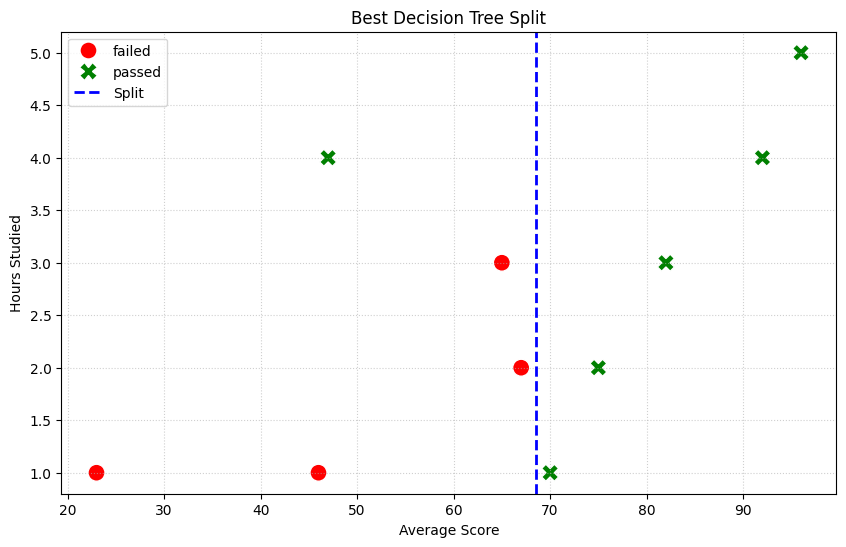

In [38]:
plt.figure(figsize=(10, 6))

# Plotting data
sns.scatterplot(
    data=df,
    x="Average Score",
    y="Hours Studied",
    hue="Result",
    palette={"failed": "red", "passed": "green"},
    s=150,
    style="Result"
)

if best_feature == "Average Score":
    plt.axvline(x=best_threshold, color="blue", linestyle="--", linewidth=2, label="Split")
else:
    plt.axhline(y=best_threshold, color="blue", linestyle="--", linewidth=2, label="Split")

plt.title("Best Decision Tree Split")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.show()

### Student Prediction

In [40]:
# User Input
input_score = 85.0
input_hours = 2.5

# Displaying student stats
print("Predicting result for student with:")
print(f"  - Average Score: {input_score}%")
print(f"  - Hours Studied: {input_hours} hours")
print("-" * 30)

# Prediction Logic
result = ""

if best_feature == "Average Score":
    if input_score <= best_threshold:
        result = "You will fail..."
    else:
        result = "You will pass!"

elif best_feature == "Hours Studied":
    if input_hours <= best_threshold:
        result = "You will fail..."
    else:
        result = "You will pass!"

print(f"Model Prediction: {result}")

Predicting result for student with:
  - Average Score: 85.0%
  - Hours Studied: 2.5 hours
------------------------------
Model Prediction: You will pass!
